In [124]:
# Importing all necessary modules.
import numpy as np 
import pandas as pd 

from sklearn import preprocessing
import xgboost as xgb
from sklearn import ensemble
from sklearn.base import BaseEstimator,TransformerMixin,ClassifierMixin
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, FastICA
from sklearn.decomposition import TruncatedSVD
from sklearn.linear_model import LassoLarsCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import make_pipeline
from sklearn.utils import check_array
from sklearn.metrics import r2_score

# model evaluation
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.feature_selection import SelectFromModel

# keras 
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, BatchNormalization, Activation
from keras.wrappers.scikit_learn import KerasRegressor
from keras.callbacks import EarlyStopping, ModelCheckpoint

# To make Results reproducible
seed = 40

# Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
color = sns.color_palette()
print("All packages successfully installed and imported")

All packages successfully installed and imported


In [125]:
# Importing data
train_set_df = pd.read_csv("train.csv")
test_set_df = pd.read_csv("test.csv")

# Getting data rows & cols
print("Training Data Dimentions: ", train_set_df.shape)
print("Test Data Dimentions: ", test_set_df.shape)

Training Data Dimentions:  (4209, 378)
Test Data Dimentions:  (4209, 377)


In [126]:
train_set_df.head(3)

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0


In [127]:
train_set_df.tail(10)

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
4199,8395,88.24,t,aa,ay,c,d,aa,l,o,...,1,0,0,0,0,0,0,0,0,0
4200,8397,108.59,z,aa,e,c,d,aa,i,w,...,1,0,0,0,0,0,0,0,0,0
4201,8399,107.39,w,v,t,d,d,aa,h,g,...,0,1,0,0,0,0,0,0,0,0
4202,8402,123.34,ap,l,s,c,d,aa,d,r,...,0,0,0,0,0,0,0,0,0,0
4203,8403,85.71,aq,s,as,c,d,aa,a,g,...,1,0,0,0,0,0,0,0,0,0
4204,8405,107.39,ak,s,as,c,d,aa,d,q,...,1,0,0,0,0,0,0,0,0,0
4205,8406,108.77,j,o,t,d,d,aa,h,h,...,0,1,0,0,0,0,0,0,0,0
4206,8412,109.22,ak,v,r,a,d,aa,g,e,...,0,0,1,0,0,0,0,0,0,0
4207,8415,87.48,al,r,e,f,d,aa,l,u,...,0,0,0,0,0,0,0,0,0,0
4208,8417,110.85,z,r,ae,c,d,aa,g,w,...,1,0,0,0,0,0,0,0,0,0


In [128]:
print(train_set_df.columns.values)

['ID' 'y' 'X0' 'X1' 'X2' 'X3' 'X4' 'X5' 'X6' 'X8' 'X10' 'X11' 'X12' 'X13'
 'X14' 'X15' 'X16' 'X17' 'X18' 'X19' 'X20' 'X21' 'X22' 'X23' 'X24' 'X26'
 'X27' 'X28' 'X29' 'X30' 'X31' 'X32' 'X33' 'X34' 'X35' 'X36' 'X37' 'X38'
 'X39' 'X40' 'X41' 'X42' 'X43' 'X44' 'X45' 'X46' 'X47' 'X48' 'X49' 'X50'
 'X51' 'X52' 'X53' 'X54' 'X55' 'X56' 'X57' 'X58' 'X59' 'X60' 'X61' 'X62'
 'X63' 'X64' 'X65' 'X66' 'X67' 'X68' 'X69' 'X70' 'X71' 'X73' 'X74' 'X75'
 'X76' 'X77' 'X78' 'X79' 'X80' 'X81' 'X82' 'X83' 'X84' 'X85' 'X86' 'X87'
 'X88' 'X89' 'X90' 'X91' 'X92' 'X93' 'X94' 'X95' 'X96' 'X97' 'X98' 'X99'
 'X100' 'X101' 'X102' 'X103' 'X104' 'X105' 'X106' 'X107' 'X108' 'X109'
 'X110' 'X111' 'X112' 'X113' 'X114' 'X115' 'X116' 'X117' 'X118' 'X119'
 'X120' 'X122' 'X123' 'X124' 'X125' 'X126' 'X127' 'X128' 'X129' 'X130'
 'X131' 'X132' 'X133' 'X134' 'X135' 'X136' 'X137' 'X138' 'X139' 'X140'
 'X141' 'X142' 'X143' 'X144' 'X145' 'X146' 'X147' 'X148' 'X150' 'X151'
 'X152' 'X153' 'X154' 'X155' 'X156' 'X157' 'X158' 'X159' 'X1

## Exploratory Data Analyses

In [129]:
train_set_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 378 entries, ID to X385
dtypes: float64(1), int64(369), object(8)
memory usage: 12.1+ MB


#### Observation: Categorcial features = 8, int type = 369, 1 = float type (y)

In [130]:
total_cols = [c for c in train_set_df.columns if 'X' in c]
counts = [[], [], []]
for c in total_cols:
    typ = train_set_df[c].dtype
    uniq = len(np.unique(train_set_df[c]))
    if uniq == 1: counts[0].append(c)
    elif uniq == 2 and typ == np.int64: counts[1].append(c)
    else: counts[2].append(c)
print('Features: {}'.format(len(total_cols)))
print('Feature_types:\n', train_set_df[total_cols].dtypes.value_counts())
print('Constant features: {} Binary features: {} Categorical features: {}'.format(*[len(c) for c in counts]))
print('Constant features:', counts[0])
print('Categorical features:', counts[2])

Features: 376
Feature_types:
 int64     368
object      8
dtype: int64
Constant features: 12 Binary features: 356 Categorical features: 8
Constant features: ['X11', 'X93', 'X107', 'X233', 'X235', 'X268', 'X289', 'X290', 'X293', 'X297', 'X330', 'X347']
Categorical features: ['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8']


In [131]:
## Viewing constant column values
train_set_df[['X11', 'X93', 'X107', 'X233', 'X235', 'X268', 'X289', 'X290', 'X293', 'X297', 'X330', 'X347']].head()

,X11,X93,X107,X233,X235,X268,X289,X290,X293,X297,X330,X347
0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0


In [132]:
## Viewing constant column values
train_set_df[['X11', 'X93', 'X107', 'X233', 'X235', 'X268', 'X289', 'X290', 'X293', 'X297', 'X330', 'X347']].tail()

,X11,X93,X107,X233,X235,X268,X289,X290,X293,X297,X330,X347
4204,0,0,0,0,0,0,0,0,0,0,0,0
4205,0,0,0,0,0,0,0,0,0,0,0,0
4206,0,0,0,0,0,0,0,0,0,0,0,0
4207,0,0,0,0,0,0,0,0,0,0,0,0
4208,0,0,0,0,0,0,0,0,0,0,0,0


### Checking for missing values

In [133]:
missing_values_df = train_set_df.isnull().sum(axis=0).reset_index()
missing_values_df.columns = ['Name_of_Columns', 'Missing_Values_Count']
missing_values_df = missing_values_df.loc[missing_values_df['Missing_Values_Count']>0]
missing_values_df = missing_values_df.sort_values(by='Missing_Values_Count')
missing_values_df

,Name_of_Columns,Missing_Values_Count


#### Observation: 
- No missing values

### Check duplicate cols

In [134]:
remove_duplicate_cols = []
duplicate_columns = list(train_set_df.T.index[train_set_df.T.duplicated(keep="first")].values)
print(duplicate_columns)

# remove duplicate with originals
remove_duplicate_cols.extend(duplicate_columns)

['X35', 'X37', 'X39', 'X76', 'X84', 'X93', 'X94', 'X102', 'X107', 'X113', 'X119', 'X122', 'X134', 'X146', 'X147', 'X172', 'X199', 'X213', 'X214', 'X216', 'X222', 'X226', 'X227', 'X232', 'X233', 'X235', 'X239', 'X242', 'X243', 'X244', 'X245', 'X247', 'X248', 'X253', 'X254', 'X262', 'X266', 'X268', 'X279', 'X289', 'X290', 'X293', 'X296', 'X297', 'X299', 'X302', 'X320', 'X324', 'X326', 'X330', 'X347', 'X360', 'X364', 'X365', 'X382', 'X385']


### Visualizing & analyses of target_variable(y)

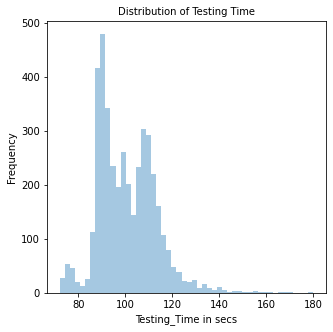

In [135]:
# Plotting histogram to check categorical variable distributions
upper_limit = 180
train_set_df['y'].loc[train_set_df['y']>upper_limit] = upper_limit

plt.figure(figsize=(5,5))
sns.distplot(train_set_df.y.values, bins=50, kde=False)
plt.ylabel('Frequency', fontsize = 10)
plt.xlabel('Testing_Time in secs', fontsize=10)
plt.title("Distribution of Testing Time",fontsize=10)
plt.show()

In [136]:
train_set_df['y'].describe()

count    4209.000000
mean      100.649047
std        12.482765
min        72.110000
25%        90.820000
50%        99.150000
75%       109.010000
max       180.000000
Name: y, dtype: float64

### Observations from above histogram
- So avg production time is 90-120 secs
- Standard distribution is centred around almost exactly 100
- Above max value 180, count of values = 0
- There are peaks in testing times around 97–98 seconds and near 108 seconds
- The testing times are bi-modal, with two distinct peaks
- This data is positively skewed, with a long tail stretching into the upper values

Text(0.5, 1.0, 'Vehicle Testing Times for Training Data')

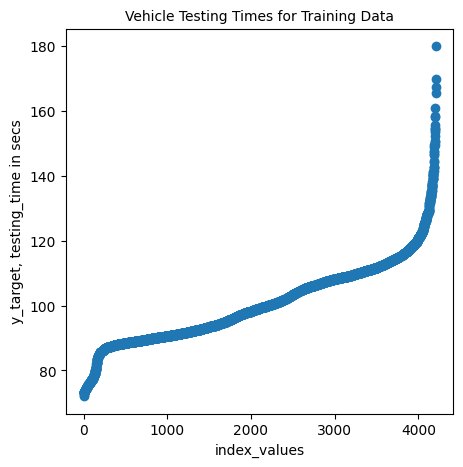

In [137]:
# Scatter Plot to visualize target variable
plt.style.use('default')
plt.figure(figsize=(5,5))
plt.scatter(range(train_set_df.shape[0]), np.sort(train_set_df.y.values))
plt.xlabel('index_values', fontsize = 10)
plt.ylabel('y_target, testing_time in secs', fontsize = 10)
plt.title('Vehicle Testing Times for Training Data', fontsize = 10)

#### Observation:
- Outliers are present. Examining box plot to set threshold value in order to remove outliers

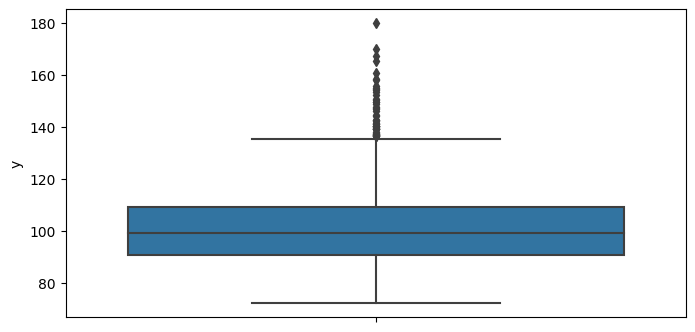

In [138]:
# Box plot
plt.figure(figsize=(8,4))
sns.boxplot(y=train_set_df['y'], data =train_set_df)
plt.show()

#### Observation:
- Set threshold = 152 and remove outliers
- It is extreme enough that it will adversely affect the performance of the algorithm

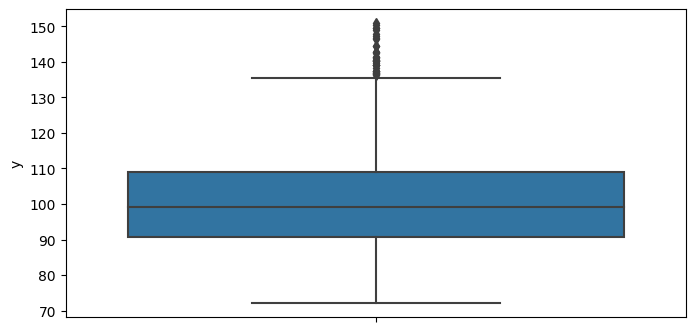

In [139]:
plt.figure(figsize=(8,4))
train_set_df_modified = train_set_df[train_set_df.y<152]
sns.boxplot(y = train_set_df_modified['y'], data = train_set_df_modified)
plt.show()

### Categorical Features Analyses

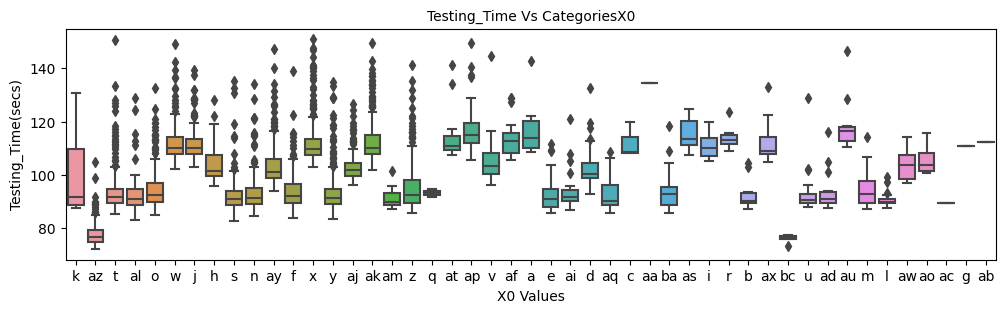

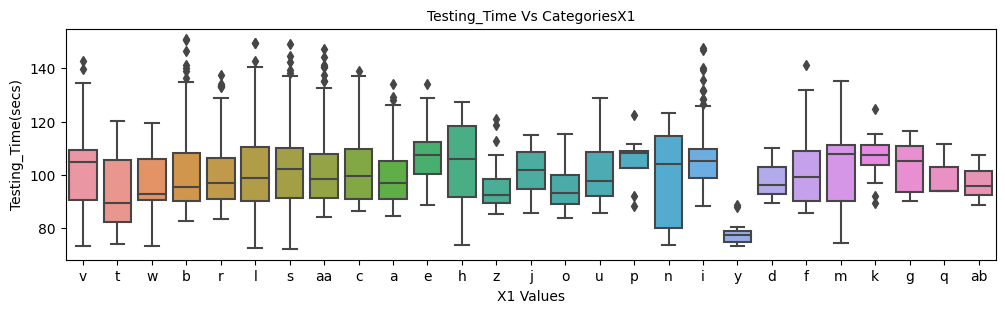

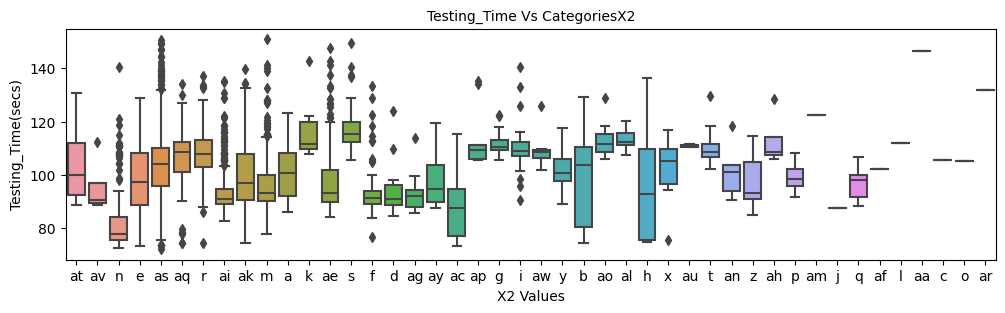

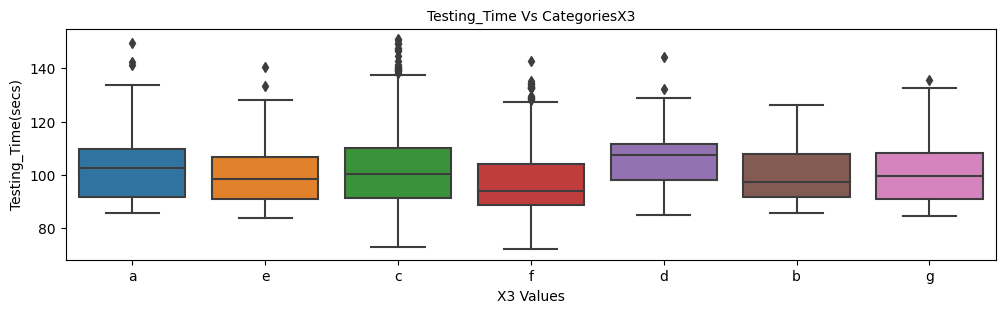

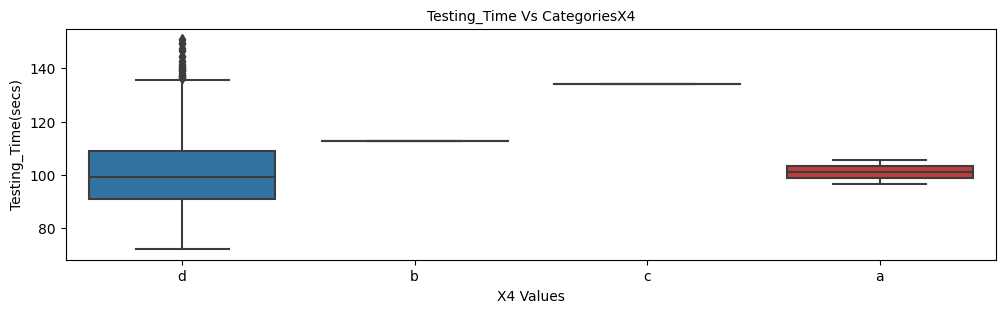

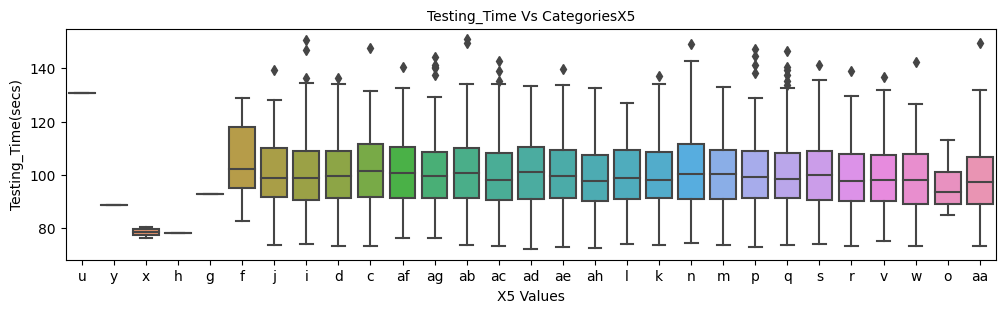

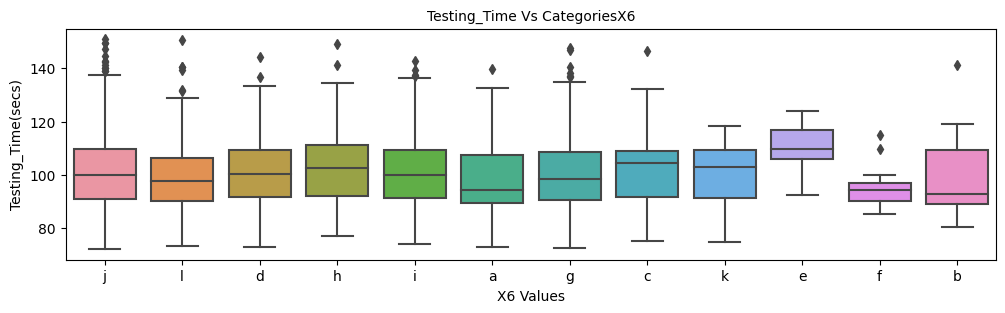

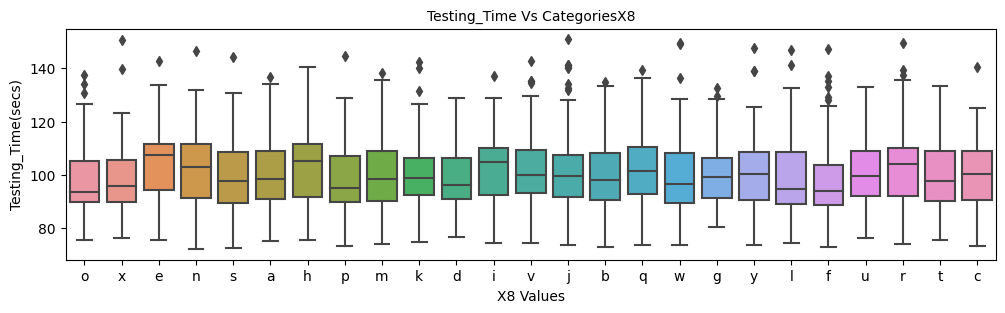

In [143]:
for val in list(train_set_df_modified.columns):
    if(train_set_df_modified[val].dtypes==np.object):
        plt.figure(figsize=(12,3))
        sns.boxplot(y=train_set_df_modified['y'], x=train_set_df_modified[val])
        plt.xlabel(val + " Values", fontsize = 10)
        plt.ylabel("Testing_Time(secs)", fontsize = 10)
        plt.title("Testing_Time Vs Categories" + val, fontsize = 10)

### Observations from above box plots:
- For Categorical Value X0
    - some features: aa, ab, ac, g occurs only once
    - The box-plots of z, y, t, o, f, n, s, al, m, ai, e, ba, aq, am, u, i, ad and b are nearly same
      The mean of these categories is nearly 93
    - The box-plots of ak, x, j, w, af, at, a, ax, i, au, as, r and c are nearly same 
      The mean of these categories is nearly 110
    - There exists grouping among different categories of X0

- For Categorical Value X1
    - For most categories, mean value = 100
    - category y seems to be seperated among all other categories

- For Categorical Value X2
    - aa, ar, i, o , j categories have only 1 value present
    - most categories mean = appox 97
    - there also exists grouping among x2 categories
    
- For Categorical Value X3
    - All categoreis have mean = 100
    - There appears to be less variation in dependent variable y across the categories of X3 
    - The box-plots for most of the categories of X3 match

- For Categorical Value X5
    - x, h, g, y and u occur very rarely in the data
    - mean among all categories is close to 98
    - There appears to be less variation in dependent variable y across the categories of X5
    - The boxplots for most of the categories of X5 match

- For Categorical Value X6
    - Box-plots of j, g, d and i match each other.
    - Most of the categories of X6 have mean around 100
    - There appears to be less variation in dependent variable y across the categories of X6
    - The boxplots for most of the categories of X6 match
     
- For Categorical Value X7
    - The mean of most of the categories of X8 is close to 100
    - There appears to be less variation in dependent variable y across the categories of X8
    - The boxplots for most of the categories of X8 match

Conclusion
    - Features X3, X5, X6, X8 and to some extent X1 shows similar distributions among the different levels

#### Observation: 
- Categorical feature X4 has low variance w.r.t other categorical features.
- d as a category dominates (approx 99 %). 
- This must be drop as no variance is present in the feature

In [22]:
print(train_set_df_modified['X4'].unique())
train_set_df_modified.X4.value_counts()

['d' 'b' 'c' 'a']


d    4192
a       2
b       1
c       1
Name: X4, dtype: int64

### Binary Features Analyses

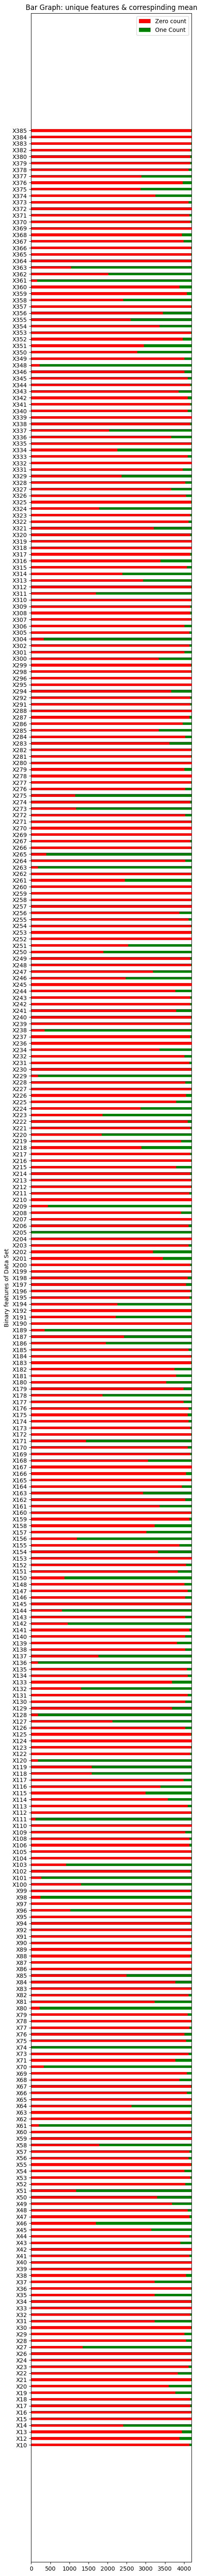

In [23]:
# Binary Feature Analyses with modification
# Reference: https://github.com/aditya2029/Mercedes-Benz-Greener-Manufacturer/blob/master/mercedes%20greener%20manufacturer_final_updated.ipynb
zero_count_list = []
one_count_list = []
cols_list = counts[1]
for col in cols_list:
    zero_count_list.append((train_set_df_modified[col]==0).sum())
    one_count_list.append((train_set_df_modified[col]==1).sum())

N = len(cols_list)
ind = np.arange(N)
width = 0.40
plt.figure(figsize=(5,80))
p1 = plt.barh(ind, zero_count_list, width, color='red')
p2 = plt.barh(ind, one_count_list, width, left=zero_count_list, color="green")
plt.yticks(ind, cols_list)
plt.ylabel("Binary features of Data Set")
plt.title("Bar Graph: unique features & correspinding mean")
plt.legend((p1[0], p2[0]), ('Zero count', 'One Count'))
plt.show()

#### Observation:
- Certain features are constant and certain features have low variance 

### Filtering out the important features and removing unwanted features

In [24]:
df_num = train_set_df_modified.loc[:,train_set_df_modified.dtypes==np.int64]
print(df_num.columns)
print()

#Removing features with 0 variance
temporary_list = []
for i in df_num.columns:
    if train_set_df_modified[i].var()==0:
        temporary_list.append(i)
print("No of features with variance 0:", len(temporary_list))
print(temporary_list)

duplicate_columns.extend(temporary_list)
duplicate_columns= list(set(duplicate_columns))
duplicate_columns.append('X4')

# Dropping X4 as it has very low variance
train_set_df_modified = train_set_df_modified.drop(duplicate_columns,axis=1)
train_set_df_modified.shape

Index(['ID', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18',
       ...
       'X375', 'X376', 'X377', 'X378', 'X379', 'X380', 'X382', 'X383', 'X384',
       'X385'],
      dtype='object', length=369)

No of features with variance 0: 13
['X11', 'X93', 'X107', 'X233', 'X235', 'X268', 'X289', 'X290', 'X293', 'X297', 'X330', 'X339', 'X347']


(4196, 319)

In [25]:
print("Number of data points:",train_set_df_modified.shape[0])
print("Number of data points removed:",train_set_df.shape[0]-train_set_df_modified.shape[0])
print("Number of features removed:",train_set_df.shape[1]-train_set_df_modified.shape[1])

Number of data points: 4196
Number of data points removed: 13
Number of features removed: 59


In [26]:
# Train set for various model training
Y_train = train_set_df_modified['y']
train_set_df_modified.drop(['y'],axis=1,inplace=True)
X_train = train_set_df_modified
train_set_df_modified.shape

(4196, 318)

### Test Set Analyses & Preparation

In [27]:
test_set_df.shape

(4209, 377)

In [28]:
test_set_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 377 entries, ID to X385
dtypes: int64(369), object(8)
memory usage: 12.1+ MB


In [29]:
test_set_df.drop(columns=["ID"], inplace=True)
X_test = test_set_df

In [30]:
test_set_df_modified = test_set_df.drop(duplicate_columns, axis=1)
test_set_df_modified.shape

(4209, 317)

In [31]:
X_test_categorical_features = test_set_df_modified.loc[:,test_set_df.dtypes==np.object]
X_test_categorical_features.shape

(4209, 7)

In [32]:
X_test_numerical = test_set_df_modified.loc[:,test_set_df.dtypes == np.int64]
X_test_numerical.shape

(4209, 310)

## Model Training
### 1.Multilayer Percepton using Keras

In [33]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# outliers removal & seperating label and features
train = train.loc[train['y'] < 150, :]
y_train = train['y']
train = train.drop(["ID", "y"], axis=1)
test = test.drop(["ID"], axis=1)
y_mean = np.mean(y_train)
# LABEL ENCODING --> CATERGORICAL FEATURES
for val in train.columns:
    if train[val].dtype == 'object':
        lbl = LabelEncoder()
        lbl.fit(list(train[val].values) + list(test[val].values))
        train[val] = lbl.transform(list(train[val].values))
        test[val] = lbl.transform(list(test[val].values))

 #### Dealing with curse of dimentionality using various dimentionality reduction techniques and adding components to datasets

In [34]:
# No of components are choosen based on experimental grounds
n_comp = 12

# Truncated Singular Value Decomposition (tSVD) 
tsvd = TruncatedSVD(n_components=n_comp, random_state=42)
tsvd_results_train = tsvd.fit_transform(train)
tsvd_results_test = tsvd.transform(test)
# Principal Component Analyses (PCA)
pca = PCA(n_components=n_comp, random_state=42)
pca2_results_train = pca.fit_transform(train)
pca2_results_test = pca.transform(test)

# Independent Component Analyses (ICA)
ica = FastICA(n_components=n_comp, random_state=42)
ica2_results_train = ica.fit_transform(train)
ica2_results_test = ica.transform(test)

for i in range(1, n_comp+1):
    train['tsvd_' + str(i)] = tsvd_results_train[:,i-1]
    test['tsvd_' + str(i)] = tsvd_results_test[:, i-1]
    train['pca_' + str(i)] = pca2_results_train[:,i-1]
    test['pca_' + str(i)] = pca2_results_test[:, i-1]
    train['ica_' + str(i)] = ica2_results_train[:,i-1]
    test['ica_' + str(i)] = ica2_results_test[:, i-1]

In [35]:
from keras import backend as K
def r2_coefficient_of_determination(y_true, y_pred):
    SS_res =  K.sum(K.square(y_true - y_pred )) 
    SS_tot = K.sum(K.square(y_true - K.mean(y_true) ) ) 
    result = ( 1 - SS_res/(SS_tot + K.epsilon()) ) 
    return result

# Model Architecture
def model():
    model = Sequential()
    #input layer
    model.add(Dense(input_dims, input_dim=input_dims))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.4))
    # hidden layer1
    model.add(Dense(input_dims))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.4))
    # hidden layer2
    model.add(Dense(input_dims//2))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.4))
    # hidden layer3
    model.add(Dense(input_dims//4, activation='relu'))
    # output layer (y_pred)
    model.add(Dense(1, activation='linear'))
    model.compile(loss='mean_squared_error',optimizer='adam',metrics=[r2_coefficient_of_determination])
    print(model.summary())
    return model

input_dims = train.shape[1]
seed = 40
np.random.seed(seed)

# Initialize estimator
estimator = KerasRegressor(build_fn=model,nb_epoch=150,batch_size=20,verbose=1)

# Save weights with model checkpoints
path="weights_final_mlp.best.hdf5"
checkpoint = ModelCheckpoint(path, monitor='val_r2_coefficient_of_determination', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

# estimator fit
history = estimator.fit(train,y_train,epochs=250,validation_split=0.3,verbose=2,shuffle=True,callbacks=callbacks_list)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 412)               170156    
_________________________________________________________________
batch_normalization (BatchNo (None, 412)               1648      
_________________________________________________________________
activation (Activation)      (None, 412)               0         
_________________________________________________________________
dropout (Dropout)            (None, 412)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 412)               170156    
_________________________________________________________________
batch_normalization_1 (Batch (None, 412)               1648      
_________________________________________________________________
activation_1 (Activation)    (None, 412)               0

147/147 - 2s - loss: 145.0634 - r2_coefficient_of_determination: -1.4645e-01 - val_loss: 57.2574 - val_r2_coefficient_of_determination: 0.5326
Epoch 25/250

Epoch 00025: val_r2_coefficient_of_determination did not improve from 0.53255
147/147 - 2s - loss: 136.5854 - r2_coefficient_of_determination: -3.8961e-02 - val_loss: 60.0280 - val_r2_coefficient_of_determination: 0.5149
Epoch 26/250

Epoch 00026: val_r2_coefficient_of_determination did not improve from 0.53255
147/147 - 2s - loss: 136.9835 - r2_coefficient_of_determination: -3.6411e-02 - val_loss: 70.3427 - val_r2_coefficient_of_determination: 0.4143
Epoch 27/250

Epoch 00027: val_r2_coefficient_of_determination did not improve from 0.53255
147/147 - 2s - loss: 147.7150 - r2_coefficient_of_determination: -1.1786e-01 - val_loss: 81.3223 - val_r2_coefficient_of_determination: 0.2952
Epoch 28/250

Epoch 00028: val_r2_coefficient_of_determination improved from 0.53255 to 0.53940, saving model to weights_final_mlp.best.hdf5
147/147 - 2

Epoch 59/250

Epoch 00059: val_r2_coefficient_of_determination did not improve from 0.58704
147/147 - 2s - loss: 97.6943 - r2_coefficient_of_determination: 0.2468 - val_loss: 53.2272 - val_r2_coefficient_of_determination: 0.5684
Epoch 60/250

Epoch 00060: val_r2_coefficient_of_determination did not improve from 0.58704
147/147 - 2s - loss: 103.4303 - r2_coefficient_of_determination: 0.2322 - val_loss: 61.9464 - val_r2_coefficient_of_determination: 0.4831
Epoch 61/250

Epoch 00061: val_r2_coefficient_of_determination did not improve from 0.58704
147/147 - 2s - loss: 97.2821 - r2_coefficient_of_determination: 0.2515 - val_loss: 63.1809 - val_r2_coefficient_of_determination: 0.4782
Epoch 62/250

Epoch 00062: val_r2_coefficient_of_determination did not improve from 0.58704
147/147 - 2s - loss: 95.8956 - r2_coefficient_of_determination: 0.2777 - val_loss: 52.5867 - val_r2_coefficient_of_determination: 0.5772
Epoch 63/250

Epoch 00063: val_r2_coefficient_of_determination did not improve from

Epoch 95/250

Epoch 00095: val_r2_coefficient_of_determination did not improve from 0.59592
147/147 - 2s - loss: 77.8288 - r2_coefficient_of_determination: 0.4110 - val_loss: 51.3247 - val_r2_coefficient_of_determination: 0.5845
Epoch 96/250

Epoch 00096: val_r2_coefficient_of_determination did not improve from 0.59592
147/147 - 2s - loss: 74.0695 - r2_coefficient_of_determination: 0.4487 - val_loss: 56.2473 - val_r2_coefficient_of_determination: 0.5434
Epoch 97/250

Epoch 00097: val_r2_coefficient_of_determination did not improve from 0.59592
147/147 - 2s - loss: 72.2961 - r2_coefficient_of_determination: 0.4743 - val_loss: 56.4018 - val_r2_coefficient_of_determination: 0.5533
Epoch 98/250

Epoch 00098: val_r2_coefficient_of_determination did not improve from 0.59592
147/147 - 2s - loss: 75.0414 - r2_coefficient_of_determination: 0.4366 - val_loss: 61.1798 - val_r2_coefficient_of_determination: 0.4900
Epoch 99/250

Epoch 00099: val_r2_coefficient_of_determination did not improve from 

Epoch 131/250

Epoch 00131: val_r2_coefficient_of_determination did not improve from 0.60360
147/147 - 1s - loss: 58.9448 - r2_coefficient_of_determination: 0.5628 - val_loss: 60.7601 - val_r2_coefficient_of_determination: 0.4916
Epoch 132/250

Epoch 00132: val_r2_coefficient_of_determination did not improve from 0.60360
147/147 - 2s - loss: 58.4065 - r2_coefficient_of_determination: 0.5759 - val_loss: 63.6950 - val_r2_coefficient_of_determination: 0.4773
Epoch 133/250

Epoch 00133: val_r2_coefficient_of_determination did not improve from 0.60360
147/147 - 2s - loss: 58.4737 - r2_coefficient_of_determination: 0.5595 - val_loss: 56.5186 - val_r2_coefficient_of_determination: 0.5366
Epoch 134/250

Epoch 00134: val_r2_coefficient_of_determination did not improve from 0.60360
147/147 - 2s - loss: 56.4135 - r2_coefficient_of_determination: 0.5822 - val_loss: 53.1105 - val_r2_coefficient_of_determination: 0.5705
Epoch 135/250

Epoch 00135: val_r2_coefficient_of_determination did not improve 

Epoch 167/250

Epoch 00167: val_r2_coefficient_of_determination did not improve from 0.60360
147/147 - 2s - loss: 51.1413 - r2_coefficient_of_determination: 0.6219 - val_loss: 59.9800 - val_r2_coefficient_of_determination: 0.4999
Epoch 168/250

Epoch 00168: val_r2_coefficient_of_determination did not improve from 0.60360
147/147 - 2s - loss: 49.8869 - r2_coefficient_of_determination: 0.6234 - val_loss: 83.1546 - val_r2_coefficient_of_determination: 0.2831
Epoch 169/250

Epoch 00169: val_r2_coefficient_of_determination did not improve from 0.60360
147/147 - 2s - loss: 49.2862 - r2_coefficient_of_determination: 0.6388 - val_loss: 59.4575 - val_r2_coefficient_of_determination: 0.5170
Epoch 170/250

Epoch 00170: val_r2_coefficient_of_determination did not improve from 0.60360
147/147 - 2s - loss: 51.7763 - r2_coefficient_of_determination: 0.6216 - val_loss: 57.4491 - val_r2_coefficient_of_determination: 0.5292
Epoch 171/250

Epoch 00171: val_r2_coefficient_of_determination did not improve 

Epoch 203/250

Epoch 00203: val_r2_coefficient_of_determination did not improve from 0.60360
147/147 - 2s - loss: 41.6429 - r2_coefficient_of_determination: 0.6910 - val_loss: 74.3948 - val_r2_coefficient_of_determination: 0.3670
Epoch 204/250

Epoch 00204: val_r2_coefficient_of_determination did not improve from 0.60360
147/147 - 1s - loss: 42.0859 - r2_coefficient_of_determination: 0.6920 - val_loss: 57.8572 - val_r2_coefficient_of_determination: 0.5249
Epoch 205/250

Epoch 00205: val_r2_coefficient_of_determination did not improve from 0.60360
147/147 - 2s - loss: 43.8725 - r2_coefficient_of_determination: 0.6636 - val_loss: 79.1429 - val_r2_coefficient_of_determination: 0.3292
Epoch 206/250

Epoch 00206: val_r2_coefficient_of_determination did not improve from 0.60360
147/147 - 1s - loss: 43.5791 - r2_coefficient_of_determination: 0.6847 - val_loss: 59.4231 - val_r2_coefficient_of_determination: 0.5185
Epoch 207/250

Epoch 00207: val_r2_coefficient_of_determination did not improve 

Epoch 239/250

Epoch 00239: val_r2_coefficient_of_determination did not improve from 0.60360
147/147 - 2s - loss: 40.5316 - r2_coefficient_of_determination: 0.6937 - val_loss: 58.8282 - val_r2_coefficient_of_determination: 0.5150
Epoch 240/250

Epoch 00240: val_r2_coefficient_of_determination did not improve from 0.60360
147/147 - 2s - loss: 38.8144 - r2_coefficient_of_determination: 0.7112 - val_loss: 56.6790 - val_r2_coefficient_of_determination: 0.5373
Epoch 241/250

Epoch 00241: val_r2_coefficient_of_determination did not improve from 0.60360
147/147 - 2s - loss: 37.0110 - r2_coefficient_of_determination: 0.7325 - val_loss: 66.5650 - val_r2_coefficient_of_determination: 0.4394
Epoch 242/250

Epoch 00242: val_r2_coefficient_of_determination did not improve from 0.60360
147/147 - 2s - loss: 40.2600 - r2_coefficient_of_determination: 0.7000 - val_loss: 66.7022 - val_r2_coefficient_of_determination: 0.4432
Epoch 243/250

Epoch 00243: val_r2_coefficient_of_determination did not improve 

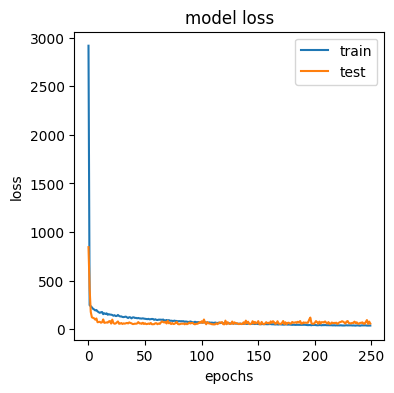

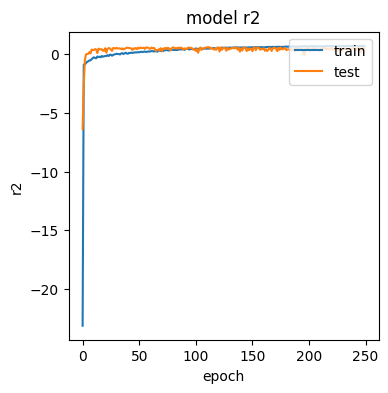

In [37]:
# summarize history for loss
plt.figure(figsize=(4, 4))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

plt.figure(figsize=(4, 4))
plt.plot(history.history['r2_coefficient_of_determination'])
plt.plot(history.history['val_r2_coefficient_of_determination'])
plt.title('model r2')
plt.ylabel('r2')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

### Observations
- No overfitting of the data
- Both graphs converge after few training steps (epochs)
- At epoch 85
    - Training Data
        - MSE loss: 81.9760 
        - R2_metric (r2_coefficient_of_determination): 0.4015 - val_loss: 51.3415 - val_r2_coefficient_of_determination: 0.5900
    - Validation Data:
        - MSE loss: 51.3415
        - R2_metric (val_r2_coefficient_of_determination): 0.5900
- Model is performing good as it is predicting 'y' (target variable) nicely 

### Predicting results

211/211 [==============================] - 0s 1ms/step
[ 78.93638  95.61344  75.93403 ... 100.47766 109.6597   92.3771 ]


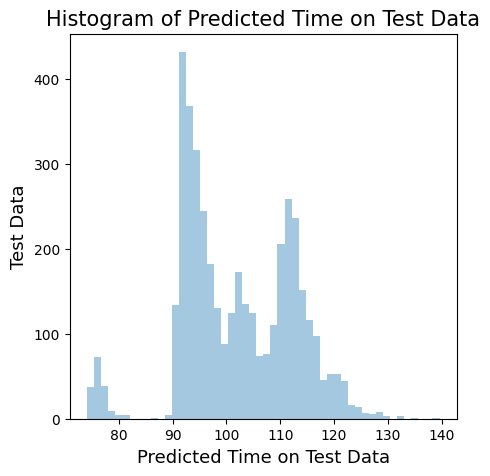

In [41]:
Dtest = pd.read_csv('test.csv')
result = estimator.predict(test).ravel()
print(result)

# create df and convert it to csv
output = pd.DataFrame({'id': Dtest["ID"], 'y': result})
output.to_csv('Keras_final.csv', index=False)

plt.figure(figsize=(5,5))
sns.distplot(output.y.values, bins=50, kde=False)
plt.xlabel('Predicted Time on Test Data', fontsize=13)
plt.ylabel('Test Data', fontsize=13)
plt.title('Histogram of Predicted Time on Test Data', fontsize=15)
plt.show()

### Observations:
- The distribution of the Predicted Time (y) on Test Data is shifted left compared to the input data distribution

## BaseLine Machine Learning Model:  RandomForest Model
### Analyse important features

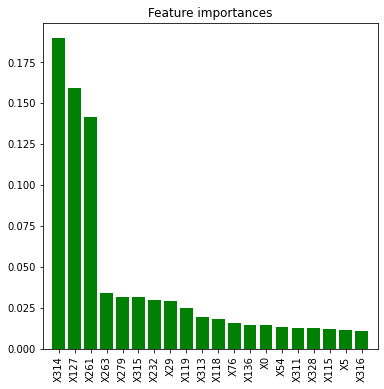

In [42]:
# implementing model
model = ensemble.RandomForestRegressor(n_estimators=200,
                                       max_depth=10, 
                                       min_samples_leaf=4, 
                                       max_features=0.2, 
                                       n_jobs=-1, 
                                       random_state=0)
# fit model
model.fit(train_X, train_y)
feat_names = train_X.columns.values

# Visualizing important features #
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
indices = np.argsort(importances)[::-1][:20]
plt.figure(figsize=(6,6))
plt.title("Feature importances")
plt.bar(range(len(indices)), importances[indices], color="g", align="center")
plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical')
plt.xlim([-1, len(indices)])
plt.show()

### Observations
- Categorical features are not coming out to be better features from random forest
- 3 Binary features: X314, X127 and X261 are dominating over other features, therefore these are important
- ID features is dropped as less important

#### For Stacked_Model, refer another code file. Due to low computation power of the system, model is developed on google colaboratory